## Load library

In [1]:
file = open("host.txt", 'r')
for line in file.readlines():
    data = line.rstrip().split(',') #using rstrip to remove the \n
    username = data[0]
    password = data[1]
    email = data[2]
    
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import Audio, display

def alldone():
    display(Audio(filename='Bossa Vega - Mike Figgis.mp3', autoplay=True))
    #display(Audio(filename='Notification Chime.wav', autoplay=True))

import os
    
from PIL import Image
import requests
from io import BytesIO

import pandas as pd
import numpy as np

import time
from lxml import html
import requests
from bs4 import BeautifulSoup

#set display image size
width = 188
height = 333

from ftplib import FTP, error_perm
ftp = FTP()
ftp.encoding = "UTF-8"

def connect_ftp():
    ftp.connect('172.96.191.12', 21) # Hawkhost
    ftp.login(email,password)
    ftp.cwd('/public_html/assets/uploads/user_uploads_report/')

connect_ftp()
    
import mysql.connector
from mysql.connector import Error

import numpy as np 
import pandas as pd   

connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

In [2]:
# Find latest report id

#%%capture
file = open("last_report_id.txt", 'r')
for line in file.readlines():
    data = line.rstrip().split(',') #using rstrip to remove the \n    
print(f"Last report that display : {data}")

#Check latest report id
response = requests.get("https://www.blacklistseller.com")
soup = BeautifulSoup(response.text, 'html.parser')
#soup.findAll('a')

latest_report_id = str(soup.findAll('a')[7])
latest_report_id=latest_report_id.split("/")[5][0:5]
latest_report_id = int(latest_report_id)

text_file = open("last_report_id.txt", encoding="utf-8", mode="w")
text_file.write(str(latest_report_id) + "\n")
#text_file.write(SQL)
text_file.close()
print(f'Recent checked report : {latest_report_id}')

Last report that display : ['15062']


6

Recent checked report : 15067


### Load list of files

In [3]:
#List all files
start_time = time.time()
mycursor.execute("select * from tb_report_item")
result = mycursor.fetchall()
field_names = [i[0] for i in mycursor.description]  #Column name
file = pd.DataFrame(result, columns=field_names)
print(round((time.time() - start_time),2), " second running time")

3.25  second running time


### Setting to override

In [5]:
#Start screening from below command

#Report that name code is still gencode is < 13400 

number_report_to_show = 20
#latest_report_id = 14771

In [6]:
#Search by report_id and group picture
start_time = time.time()
report_id_to_show =[]
report_id_to_show = list(range(latest_report_id-number_report_to_show+1,latest_report_id+1))
report_id_to_show = [str(x).zfill(len(str(number_report_to_show))) for x in report_id_to_show]


#selected = file[(file['report_id'].isin(report_id_to_show)) & (file['report_item_active'] == 1)]
selected = file[(file['report_id'].isin(report_id_to_show))]

print("Total pictures = " + str(selected.shape[0]))

#Prepare group list
recent_pic = selected['report_item_filename'].values.tolist()

#create variable "group" : a list that group pic for each report_id
temp=[]
group = []
k=0

for x in report_id_to_show:
    for j in range(len(recent_pic)):        
        if recent_pic[j][1:6] == str(x):
            temp.append(recent_pic[j])
        #group[k]= temp
    try:
        group.append(temp)
    except IndexError:
        print("some error")
    
    temp=[]
    k+=1
    

Total pictures = 180


### Display report pictures

In [ ]:
#Display report pictures
start_time = time.time()

test=[]
for x in group:
    z=0
    test=[]
    for y in range(len(x)):        
        url = "https://www.blacklistseller.com/assets/uploads/user_uploads_report/" + x[z]
        test.append(url)
        z+=1
        
    if x != []:
        x[z-1][1:6]

        x_offset = 0
        new_im = Image.new('RGB', (width*len(x),height))
        for x in test:
            response = requests.get(x)

            try:
                img = Image.open(BytesIO(response.content))
            except IOError:
                #print '%s could not be opened' % imagepath
                print("Could not opened")

            img = img.resize( (width , height), resample=0)

            new_im.paste(img, (x_offset,0))
            x_offset += width
        new_im

alldone()        
print(round((time.time() - start_time)/60,2), " minutes running time")

# ============END==============

## Find user who create by report id

In [8]:
x = 15060   # report id to find

connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

TEXT = "SELECT tb_report.report_id, tb_user.user_id, tb_user.username, tb_user.facebook_id, tb_user.first_name, tb_user.last_name, tb_user.email, tb_user.phone_number, tb_report.first_name, tb_report.last_name FROM tb_report JOIN tb_user ON tb_report.user_id = tb_user.user_id WHERE tb_report.report_id = " + str(x)
mycursor.execute(TEXT)
result = mycursor.fetchall()
field_names = [i[0] for i in mycursor.description]
pd.DataFrame(result, columns=field_names)


report_id  user_id username        facebook_id first_name  last_name email  \
0      15060    41505           10217721669287674   Tanakorn  Phongsing     0   

  phone_number  first_name last_name  
0               วิศัลย์ศยา     บุญมา

## Find user who create by lastname

In [9]:
x = 'บุญมา'  # report id to find

connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

TEXT = "SELECT tb_report.report_id, tb_user.user_id, tb_user.username, tb_user.facebook_id, tb_user.first_name, tb_user.last_name, tb_user.email, tb_user.phone_number, tb_report.first_name, tb_report.last_name FROM tb_report JOIN tb_user ON tb_report.user_id = tb_user.user_id WHERE tb_report.last_name LIKE '" + x +"'"
TEXT
mycursor.execute(TEXT)
result = mycursor.fetchall()
field_names = [i[0] for i in mycursor.description]
pd.DataFrame(result, columns=field_names)


"SELECT tb_report.report_id, tb_user.user_id, tb_user.username, tb_user.facebook_id, tb_user.first_name, tb_user.last_name, tb_user.email, tb_user.phone_number, tb_report.first_name, tb_report.last_name FROM tb_report JOIN tb_user ON tb_report.user_id = tb_user.user_id WHERE tb_report.last_name LIKE 'บุญมา'"

report_id  user_id   username        facebook_id first_name  \
0       4114    14151     Natiya                        Natiya   
1       5201    15543  Sukanya_U                       Sukanya   
2       9974    28456              2979749475432213    Savarod   
3      14423    39992               488542938735040        Sue   
4      14560    40391   Yuthchai                       ยุทธชัย   
5      14827    40937             10219327272586825   Thanadon   
6      14832    40947     Napato                         นภัทร   
7      15060    41505             10217721669287674   Tanakorn   

          last_name                         email phone_number  first_name  \
0               Nae       nae_naetiya@hotmail.com   0956735848    วีรนันท์   
1             Unjan  Sukanya_golfcopy@hotmail.com   0877858685       สมฤดี   
2  Charoenpuntuwong                             0                    สมฤดี   
3               Tan                             0               วิศัลย์ศยา   
4         เม่นมุกดา            Yuthchai@gmail.com   0819915138  วิศัลย์ศยา   
5       Loataveesuk                             0               วิศัลย์ศยา   
6        เจริญศิลป์          napato0024@gmail.com   0853662921  วิศัลย์ศยา   
7         Phongsing                             0               วิศัลย์ศยา   

  last_name  
0     บุญมา  
1     บุญมา  
2     บุญมา  
3     บุญมา  
4     บุญมา  
5     บุญมา  
6     บุญมา  
7     บุญมา

## Find most freq name recently

In [ ]:
connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

TEXT = "SELECT count(*),first_name,last_name FROM tb_report where report_id IN (SELECT report_id FROM `tb_report` WHERE create_date >= (CURRENT_TIMESTAMP()-60*60*24*2)) GROUP by last_name order by count(*) DESC limit 10"
TEXT
mycursor.execute(TEXT)
result = mycursor.fetchall()
field_names = [i[0] for i in mycursor.description]
pd.DataFrame(result, columns=field_names)

## Set report_active = 0

In [15]:
to_disable = ""
to_disable = input()

connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

TEXT = "UPDATE `tb_report` SET `active` = '0' WHERE `tb_report`.`report_id` = " + str(to_disable)
mycursor.execute(TEXT)
connection.commit()    

6795


## To display specific report picture

'มลิษา ชนะรัตน์'

Number of picture: 6


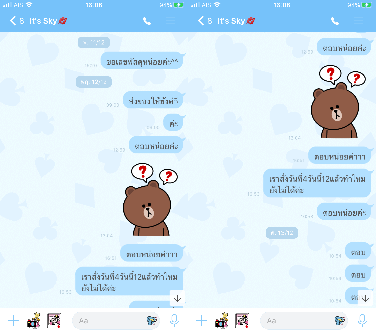

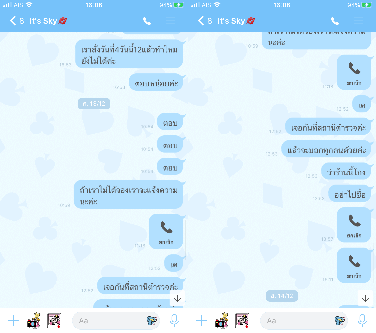

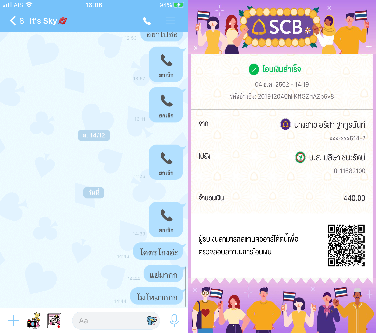

In [35]:
to_display = 14817  

#display name
response = requests.get("https://www.blacklistseller.com/report/report_preview/" + str(to_display))
soup = BeautifulSoup(response.text, 'html.parser')
linetoscreen = str(soup.findAll('a')[5])
name = linetoscreen.split("</a>")[0].split('>')[1]
name

list_of_report = file[(file['report_id'] == to_display) & (file['report_item_active'] == 1)]['report_item_filename'].values.tolist()
print(f'Number of picture: {len(list_of_report)}')
link=[]
for x in list_of_report:
    url = "https://www.blacklistseller.com/assets/uploads/user_uploads_report/" + x
    link.append(url)

split_by = round(len(link)/3)
link1 = link[0:split_by]
link2 = link[split_by:split_by*2]
link3 = link[split_by*2:]
sum_link = []
sum_link.append(link1)
sum_link.append(link2)
sum_link.append(link3)

for y in sum_link:    
    x_offset = 0
    new_im = Image.new('RGB', (width*len(y),height))
    for x in y:
        response = requests.get(x)

        #img = Image.open(BytesIO(response.content))
        #img = img.resize( (width , height), resample=0)
        try:
            img = Image.open(BytesIO(response.content))
        except IOError:
            #print '%s could not be opened' % imagepath
            print("Could not opened")

        img = img.resize( (width , height), resample=0)

        new_im.paste(img, (x_offset,0))
        x_offset += width
    new_im        
    


## DELETE report pics + db

In [4]:
connect_ftp()

connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

to_delete = ""
to_delete = input()
to_delete = to_delete.split()
print("ลบด้วยเหตุผลพิเศษ?")
reason = ""
reason = input()
print("List of report_id to delete " + str(to_delete))
print("\n")

df_prepare_to_del = file[(file['report_id'].isin(to_delete))]
file_to_del = df_prepare_to_del['report_item_filename'].values.tolist()
    
#delete files    
for x in file_to_del:    
    print("ftp.delete('" + x + "')")            
    try:
        ftp.delete(x)
    except error_perm:
        print("!!  file already deleted")
    
SQL = "" #SQL code to delete report
for x in to_delete:
    TEXT = "UPDATE tb_report SET active = 0 WHERE tb_report.report_id = " + str(x)
    TEXT
    mycursor.execute(TEXT)
    connection.commit()

    #Delete db record
    TEXT = "DELETE FROM tb_report_item WHERE tb_report_item.report_id = " + str(x)
    TEXT
    mycursor.execute(TEXT)
    connection.commit()
    
    #Add detail text
    if reason == "":
        TEXT = "UPDATE tb_report SET detail_text = CONCAT(' !รายงานถูกลบเนื่องจากรายละเอียดไม่เพียงพอ! | ', detail_text) WHERE `tb_report`.`report_id` = " + str(x) +";"
        TEXT
        mycursor.execute(TEXT)
        connection.commit()
    else:
        TEXT = "UPDATE tb_report SET detail_text = CONCAT(' "+ str(reason)+ " | ', detail_text) WHERE `tb_report`.`report_id` = " + str(x) +";"
        TEXT
        mycursor.execute(TEXT)
        connection.commit()            
    


13121
ลบด้วยเหตุผลพิเศษ?
เคสทวงหนี้ ที่ติดต่อมาทางเมล์
List of report_id to delete ['13121']




'UPDATE tb_report SET active = 0 WHERE tb_report.report_id = 13121'

'DELETE FROM tb_report_item WHERE tb_report_item.report_id = 13121'

"UPDATE tb_report SET detail_text = CONCAT(' เคสทวงหนี้ ที่ติดต่อมาทางเมล์ | ', detail_text) WHERE `tb_report`.`report_id` = 13121;"

## DELETE specific pic by filename

In [8]:
#Delete specific file name

connect_ftp()

connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

to_delete = "F7JT5ADNN4F_75380073_2449708948619606_570201116642377728_o.jpg"
#to_delete = input()

try:
    ftp.delete(to_delete)
except error_perm:
    print("!!  file already deleted")
    
TEXT = "DELETE FROM tb_report_item WHERE tb_report_item.report_item_filename = '" + to_delete +"'"
TEXT
mycursor.execute(TEXT)
connection.commit()

!!  file already deleted


"DELETE FROM tb_report_item WHERE tb_report_item.report_item_filename = 'F7JT5ADNN4F_75380073_2449708948619606_570201116642377728_o.jpg'"

## Clean tb_report

In [4]:
connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

mycursor.execute("select * from tb_report")
result = mycursor.fetchall()
field_names = [i[0] for i in mycursor.description]  #Column name
tb_report = pd.DataFrame(result, columns=field_names)

df = tb_report[['report_id','first_name','last_name','idcard']]
df['fullname'] = df['first_name']+ " " + df['last_name']

### Fuzzzywuzzy : detect wrong name

In [10]:
from fuzzywuzzy import fuzz
df_master=df['fullname'].value_counts().head(800)
df_master.tail()

ดลญา คัดชานันท์        3
สุพัตตรา สุดใจ         3
ลลิตา ปรีชาวุฒิพงษ์    3
กมลเทพ ลำเภา           3
เดโช แสงทอง            3
Name: fullname, dtype: int64

In [6]:
df_master = pd.DataFrame(df_master)
df_master.rename({'fullname':'count'}, inplace=True )
df_master['fullname'] = df_master.index
df_master.reset_index(level=0, inplace=True)
df_master.drop('index', axis=1, inplace = True)

df_to_clean = df[~df.fullname.isin(df_master.fullname)]
df_to_clean.shape

(5677, 5)

### Start using Fuzzy

In [7]:
#df[df['fullname'].str.match(x)]
i=1
SQL = ""
for index, row in df_to_clean.iterrows():
    for y in df_master['fullname']:
        score = fuzz.ratio(row['fullname'],y)
        if ( score > 90) and ( score != 100):
            name = y.split()
            TEXT = "UPDATE tb_report SET first_name ='"+name[0]+"',"+"last_name = '"+name[1]+"'"+" WHERE tb_report.report_id = "+str(row['report_id'])+";#"
            TEXT
            SQL=SQL+TEXT
            print(i, "Report ID :", row['report_id'],"| Score:",score,"  \nผิด --> ",row['fullname'],"  \nถูก --> ",y,"\n")
            
alldone()

"UPDATE tb_report SET first_name ='นาลิวัน',last_name = 'สิงห์ทองลา' WHERE tb_report.report_id = 4596;#"

1 Report ID : 4596 | Score: 94   
ผิด -->  นาลิวัล สิงห์ทองลา   
ถูก -->  นาลิวัน สิงห์ทองลา 



"UPDATE tb_report SET first_name ='ชนิดา',last_name = 'พรมสุรีย์' WHERE tb_report.report_id = 15051;#"

1 Report ID : 15051 | Score: 93   
ผิด -->  ชนิดา พรมสุริย์   
ถูก -->  ชนิดา พรมสุรีย์ 



### Execute SQL command to fix wrong name

In [8]:
connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

SQL_list = SQL.split('#')
#SQL_list
for x in SQL_list:
    x
    mycursor.execute(x)
    connection.commit()    

"UPDATE tb_report SET first_name ='นาลิวัน',last_name = 'สิงห์ทองลา' WHERE tb_report.report_id = 4596;"

"UPDATE tb_report SET first_name ='ชนิดา',last_name = 'พรมสุรีย์' WHERE tb_report.report_id = 15051;"

''

## Filling missing idcard

In [56]:
# Prepare tb_report
connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

mycursor.execute("select * from tb_report")
result = mycursor.fetchall()
field_names = [i[0] for i in mycursor.description]  #Column name
tb_report = pd.DataFrame(result, columns=field_names)

df = tb_report[['report_id','first_name','last_name','idcard']]
df['fullname'] = df['first_name']+ " " + df['last_name']

In [57]:
df_master=df['idcard'].value_counts().head(300)
df_master.tail()
print("Total unique in master file =",len(df_master))
df_master = pd.DataFrame(df_master,index=None)
df_master.columns

1219900672166    2
1320500284780    2
3320600114254    2
1311600013525    2
8500476022895    2
Name: idcard, dtype: int64

Total unique in master file = 300


Index(['idcard'], dtype='object')

In [14]:
df_master['idcard1'] = df_master.index
df_master['count'] = df_master['idcard']
df_master.drop('idcard', axis=1, inplace = True)
df_master.reset_index(level=0, inplace=True)
df_master.drop('index', axis=1, inplace = True)
df_master.rename(columns={'idcard1':'idcard'}, inplace=True )
df_master = pd.merge(df_master, df, left_on='idcard', right_on='idcard', how = 'left')
df_master = df_master[['idcard','count','fullname']]
df_master.drop_duplicates(subset ="idcard", keep = 'first', inplace = True) 

df_master=df_master.drop(df_master.index[0])  #drop null idcard in master file
df_master.head()

idcard  count         fullname
7903  1100201032560    305  มัญลิกา มีเอียด
8208  5341600023299    277    นภาลัย แสงบุญ
8485  1100700846058     52   อณาริน จำนงบุญ
8537  1100400651642     51   สุพรรษา นามตาน
8588  1200500063351     48  ก่อการ พรหมเต็ม

In [15]:
class color:
    purple = '\033[95m'
    cyan = '\033[96m'
    darkcyan = '\033[36m'
    blue = '\033[94m'
    green = '\033[92m'
    yellow = '\033[93m'
    red = '\033[91m'
    bold = '\033[1m'
    underline = '\033[4m'
    end = '\033[0m'

def checkPID(pid):
  if(len(pid) != 13):
    return False
  num=0 
  num2=13
  listdata=list(pid) 
  sum=0 
  while num<12:
    sum+=int(listdata[num])*(num2-num) 
    num+=1 
  digit13 = sum%11
  if digit13==0: 
    digit13=1 
  elif digit13==1:
    digit13=0
  else:
    digit13=11-digit13 
  if digit13==int(listdata[12]):
    return True
  else:
    return False


print(color.bold + "Check incorrect idcard from master db\n"+color.end)

# for x in df_master.idcard:
#     if checkPID(x) == False:
#         x
    
for index, row in df_master.iterrows():
    if checkPID(row.idcard) == False:
        print(f'Report id:{index} | National id: {row.idcard} | Name: {row.fullname}')        
print(color.cyan + 'Finished !' + color.end)

df_to_clean = df[~df['idcard'].isin(df_master['idcard'])]
#df_to_clean['id_card'].sort_values().head(100)
print(f'Total in df: {df.shape[0]}')
print(f'Total in master file: {df_master.shape[0]}')
print(f'Total in df_to_clean: {df_to_clean.shape[0]}')
df_to_clean.drop('idcard', axis=1, inplace = True)

df_filled = pd.merge(df_to_clean, df_master,on='fullname', how='inner')
print(f'Total to be fixed: {df_filled.shape[0]}')
df_filled['idcard']=df_filled['idcard'].astype('uint64')

Check incorrect idcard from master db

Report id:9412 | National id: 1509901305379 | Name: ภาทวิดา ชมภูละม้าย
Report id:9690 | National id: 1420000057725 | Name: ศิริรัตน์ วงศ์ผาบุตร
Report id:10106 | National id: 511020003136 | Name: อัญชลี สัมพันธมิตร
Finished !
Total in df: 11649
Total in master file: 299
Total in df_to_clean: 8951
Total to be fixed: 10


### Begin idcard matching

In [16]:
i=0
TEXT=""
SQL=""
for index, row in df_filled.iterrows():   
    TEXT = "UPDATE tb_report SET idcard = " + str(row['idcard']) + " WHERE tb_report.report_id = "+ str(row['report_id']) +";#"
    SQL+=str(TEXT)

In [17]:
SQL_list = SQL.split('#')
print(f'Number of report to fix idcard : {len(SQL_list)}')
SQL_list

Number of report to fix idcard : 11


['UPDATE tb_report SET idcard = 1770400085102 WHERE tb_report.report_id = 4600;',
 'UPDATE tb_report SET idcard = 1770400085102 WHERE tb_report.report_id = 4601;',
 'UPDATE tb_report SET idcard = 5341600023299 WHERE tb_report.report_id = 14769;',
 'UPDATE tb_report SET idcard = 1401800079022 WHERE tb_report.report_id = 14778;',
 'UPDATE tb_report SET idcard = 1849900188994 WHERE tb_report.report_id = 14867;',
 'UPDATE tb_report SET idcard = 2819800011292 WHERE tb_report.report_id = 14907;',
 'UPDATE tb_report SET idcard = 1720800004657 WHERE tb_report.report_id = 14934;',
 'UPDATE tb_report SET idcard = 1710600145109 WHERE tb_report.report_id = 14947;',
 'UPDATE tb_report SET idcard = 1539900563143 WHERE tb_report.report_id = 14953;',
 'UPDATE tb_report SET idcard = 1749900162953 WHERE tb_report.report_id = 14968;',
 '']

### Execute command to fix id card

In [18]:
connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

for x in SQL_list:
    mycursor.execute(x)
    x
    connection.commit()    

'UPDATE tb_report SET idcard = 1770400085102 WHERE tb_report.report_id = 4600;'

'UPDATE tb_report SET idcard = 1770400085102 WHERE tb_report.report_id = 4601;'

'UPDATE tb_report SET idcard = 5341600023299 WHERE tb_report.report_id = 14769;'

'UPDATE tb_report SET idcard = 1401800079022 WHERE tb_report.report_id = 14778;'

'UPDATE tb_report SET idcard = 1849900188994 WHERE tb_report.report_id = 14867;'

'UPDATE tb_report SET idcard = 2819800011292 WHERE tb_report.report_id = 14907;'

'UPDATE tb_report SET idcard = 1720800004657 WHERE tb_report.report_id = 14934;'

'UPDATE tb_report SET idcard = 1710600145109 WHERE tb_report.report_id = 14947;'

'UPDATE tb_report SET idcard = 1539900563143 WHERE tb_report.report_id = 14953;'

'UPDATE tb_report SET idcard = 1749900162953 WHERE tb_report.report_id = 14968;'

''

## Download pictures

In [4]:
connect_ftp()

id_to_download = ""
id_to_download = input()
id_to_download = id_to_download.split()


df_file_to_download = file[(file['report_id'].isin(id_to_download))]
file_to_download = df_file_to_download['report_item_filename'].values.tolist()

for x in file_to_download: 
    localfile = open(x, 'wb')
    ftp.retrbinary('RETR ' + x, localfile.write, 1024)
    #ftp.quit()
    localfile.close()

15060


'226-File successfully transferred\n226 8.197 seconds (measured here), 0.65 Mbytes per second'

'226-File successfully transferred\n226 0.391 seconds (measured here), 1.40 Mbytes per second'

'226-File successfully transferred\n226 0.254 seconds (measured here), 1.50 Mbytes per second'

'226-File successfully transferred\n226 3.649 seconds (measured here), 0.69 Mbytes per second'

'226-File successfully transferred\n226 1.869 seconds (measured here), 0.83 Mbytes per second'

'226-File successfully transferred\n226 2.613 seconds (measured here), 0.78 Mbytes per second'

'226-File successfully transferred\n226 1.674 seconds (measured here), 0.77 Mbytes per second'

'226-File successfully transferred\n226 0.149 seconds (measured here), 0.58 Mbytes per second'

## Upload pictures

In [7]:
for x in file_to_download:
    TEXT = "https://www.blacklistseller.com/assets/uploads/user_uploads_report/" + str(x)
    TEXT

'https://www.blacklistseller.com/assets/uploads/user_uploads_report/[15060]_Screenshot_2019-12-19-23-18-23-729_com.facebook.orca.png'

'https://www.blacklistseller.com/assets/uploads/user_uploads_report/[15060]_Screenshot_2019-12-19-23-20-07-201_com.facebook.orca.jpg'

'https://www.blacklistseller.com/assets/uploads/user_uploads_report/[15060]_Screenshot_2019-12-20-08-29-59-331_com.android.chrome.jpg'

'https://www.blacklistseller.com/assets/uploads/user_uploads_report/[15060]_IMG_20191220_085402.jpg'

'https://www.blacklistseller.com/assets/uploads/user_uploads_report/[15060]_IMG_20191220_085606.jpg'

'https://www.blacklistseller.com/assets/uploads/user_uploads_report/[15060]_IMG_20191220_085721.jpg'

'https://www.blacklistseller.com/assets/uploads/user_uploads_report/[15060]_IMG_20191220_085836.jpg'

'https://www.blacklistseller.com/assets/uploads/user_uploads_report/[15060]_received_2484942041795081.jpeg'

In [5]:
connect_ftp()
 
for x in file_to_download:
    fp = open(x, 'rb')
    ftp.storbinary('STOR %s' % os.path.basename(x), fp, 1024)
    x
    fp.close()


'226-File successfully transferred\n226 9.164 seconds (measured here), 0.56 Mbytes per second'

'[15060]_Screenshot_2019-12-19-23-18-23-729_com.facebook.orca.png'

'226-File successfully transferred\n226 1.091 seconds (measured here), 0.50 Mbytes per second'

'[15060]_Screenshot_2019-12-19-23-20-07-201_com.facebook.orca.jpg'

'226-File successfully transferred\n226 0.844 seconds (measured here), 0.51 Mbytes per second'

'[15060]_Screenshot_2019-12-20-08-29-59-331_com.android.chrome.jpg'

'226-File successfully transferred\n226 4.869 seconds (measured here), 0.56 Mbytes per second'

'[15060]_IMG_20191220_085402.jpg'

'226-File successfully transferred\n226 2.680 seconds (measured here), 0.55 Mbytes per second'

'[15060]_IMG_20191220_085606.jpg'

'226-File successfully transferred\n226 3.934 seconds (measured here), 0.54 Mbytes per second'

'[15060]_IMG_20191220_085721.jpg'

'226-File successfully transferred\n226 2.597 seconds (measured here), 0.53 Mbytes per second'

'[15060]_IMG_20191220_085836.jpg'

'226-File successfully transferred\n226 0.327 seconds (measured here), 388.63 Kbytes per second'

'[15060]_received_2484942041795081.jpeg'

## Display most freq name in 30 days

In [36]:
connection = mysql.connector.connect(host='172.96.191.12',database='blacklis_dbnew',user=username,password=password)
mycursor = connection.cursor()

mycursor.execute("SELECT count(*) AS Freq,first_name,last_name FROM tb_report where report_id IN (SELECT report_id FROM `tb_report` WHERE create_date >= (CURRENT_TIMESTAMP()-INTERVAL 30 DAY)) GROUP by last_name order by count(*) DESC limit 10")
result = mycursor.fetchall()

#Get column name
field_names = [i[0] for i in mycursor.description]

pd.DataFrame(result, columns=field_names)

Freq     first_name      last_name
0    88  บจก.กิจอัศวิน  บจก.กิจอัศวิน
1    33         จิดาภา      ฮกเหลี่ยม
2    24     กิ่งกาญจน์      สุทธิเกิด
3    20         นภาลัย         แสงบุญ
4    17            เมฆ          ตาทอง
5    16           ชลิต        กองแก้ว
6    15         สุนิสา         นกน้อย
7    15         ไม่รู้         ไม่รู้
8    14          ทรงพล    ภักดีพันดอน
9    12          กฤษฎา       ไชยศรีษะ

## Resize picture

In [ ]:
import cv2
#url = "https://www.blacklistseller.com/assets/uploads/user_uploads_report/" + x
url = "https://www.blacklistseller.com/assets/uploads/user_uploads_report/[15004]_DFF24C22-8876-48D9-BE95-3A8A8C9FEEAA.png"

filesize = int(float(requests.get(url, stream=True).headers['Content-length'])/1000000)
print(f'{filesize} MB')

#====== use openCV to resize image ======

img = cv2.imread('Phenol logo.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',resized.shape)
     
## Code to display pic (error)    
# cv2.startWindowThread()
# cv2.imshow("Resized image", resized)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

connect_ftp()
ftp.cwd('/public_html/assets/test_upload/')

#ftp.storbinary('STOR ' + "xxx.jpg", resized)
ftp.storbinary("xxx.png", resized)
#ftp.storbinary('STOR %s' % os.path.basename("xx"), resized, 1024)

# for x in file_to_download:
#     fp = open(x, 'rb')
#     ftp.storbinary('STOR %s' % os.path.basename(x), fp, 1024)
#     x
#     fp.close()

1 MB
Original Dimensions :  (94, 264, 4)
Resized Dimensions :  (47, 132, 4)


'250 OK. Current directory is /public_html/assets/test_upload'

In [46]:
#file.head()

for x in file:
    if file['report_id'] > 105:
        print(x)
    #if 100 < file['report_id'] and file['report_id'] > 105:

TypeError: cannot convert the series to <class 'int'>